# 1. by HAMZAOUI Thameur & OMARI HAMZA

In [8]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import os, shutil, pathlib
!rm -rf /content/logs

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')


[]

# 3. Setup directories and cleaning data of our dataset

In [10]:
# Setup the directory of training, test and validation data
data_dir_train = "C:/Users/Thameur/Desktop/projet/Data/train"
data_dir_validation = "C:/Users/Thameur/Desktop/projet/Data/valid"
data_dir_test = "C:/Users/Thameur/Desktop/projet/Data/test"

# Managing the extension of the files
image_exts = ['jpeg','jpg', 'bmp', 'png']



# 4. Load the data

In [11]:
# Specify inage dimensions
IMAGE_SHAPE = (150, 150)

# Load data
# Load data with data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    shear_range=.2,
    zoom_range=.2,
    width_shift_range=.2,
    height_shift_range=.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    data_dir_train,
    shuffle=True,
    target_size=IMAGE_SHAPE,
    class_mode='categorical'
)

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

valid_generator = datagen.flow_from_directory(
    data_dir_validation,
    shuffle=False,
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    data_dir_test,
    shuffle=True,
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical'
)

# Check names and number of classes
names_of_classes = sorted(os.listdir(data_dir_test))
print(f"\nNames of Classes : {names_of_classes}".format(names_of_classes))
number_of_classes = len(names_of_classes)

Found 364 images belonging to 10 classes.
Found 88 images belonging to 10 classes.
Found 86 images belonging to 10 classes.

Names of Classes : ['Bitraff', 'carrot', 'courget', 'haricot', 'obergin', 'oignon', 'poiverent', 'poivre', 'radis', 'tome de terre']


# 4. Explore data

In [12]:
# Check number of images in each subfolder for each class

def count_files_in_subfolder(subfolder):
    
    for path in pathlib.Path(subfolder).iterdir():
        if path.is_dir():
            print("Class " + str(path.name) + ": " + \
                  str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files")

print("Train data:")
count_files_in_subfolder(os.path.join(data_dir_train))
print("\nTest data:")
count_files_in_subfolder(os.path.join(data_dir_test))
print("\nValidation data:")
count_files_in_subfolder(os.path.join(data_dir_validation))

Train data:
Class Bitraff: 33 files
Class carrot: 34 files
Class courget: 32 files
Class haricot: 32 files
Class obergin: 30 files
Class oignon: 39 files
Class poiverent: 32 files
Class poivre: 32 files
Class radis: 32 files
Class tome de terre: 52 files

Test data:
Class Bitraff: 8 files
Class carrot: 10 files
Class courget: 9 files
Class haricot: 16 files
Class obergin: 6 files
Class oignon: 10 files
Class poiverent: 10 files
Class poivre: 4 files
Class radis: 5 files
Class tome de terre: 8 files

Validation data:
Class Bitraff: 12 files
Class carrot: 10 files
Class courget: 9 files
Class haricot: 9 files
Class obergin: 10 files
Class oignon: 9 files
Class poiverent: 9 files
Class poivre: 5 files
Class radis: 7 files
Class tome de terre: 8 files


# 5. CNN model

In [13]:
# model object
model = Sequential()

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)     

In [14]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

hist = model.fit(train_generator, 
                 epochs=15, 
                 verbose=1, 
                 validation_data=valid_generator, 
                 steps_per_epoch = 320//32, 
                 validation_steps = 40//32, 
                 callbacks=early_stopping)

Epoch 1/15
10/10 [==============================] - 34s 3s/step - loss: 152.0425 - accuracy: 0.1300 - val_loss: 2.2966 - val_accuracy: 0.0312
Epoch 2/15
10/10 [==============================] - 31s 3s/step - loss: 2.2275 - accuracy: 0.2733 - val_loss: 2.2963 - val_accuracy: 0.4688
Epoch 3/15
10/10 [==============================] - 31s 3s/step - loss: 1.5508 - accuracy: 0.4767 - val_loss: 2.2847 - val_accuracy: 0.6875
Epoch 4/15
10/10 [==============================] - 32s 3s/step - loss: 1.0787 - accuracy: 0.6367 - val_loss: 2.2754 - val_accuracy: 0.3125
Epoch 5/15
10/10 [==============================] - 31s 3s/step - loss: 0.8889 - accuracy: 0.6767 - val_loss: 2.2700 - val_accuracy: 0.6875
Epoch 6/15
10/10 [==============================] - 33s 3s/step - loss: 0.7573 - accuracy: 0.7031 - val_loss: 2.2643 - val_accuracy: 0.5000
Epoch 7/15
10/10 [==============================] - 31s 3s/step - loss: 0.5333 - accuracy: 0.8067 - val_loss: 2.2548 - val_accuracy: 0.5625
Epoch 8/15
10/10 [

# 6. Plotting the error and accuracy

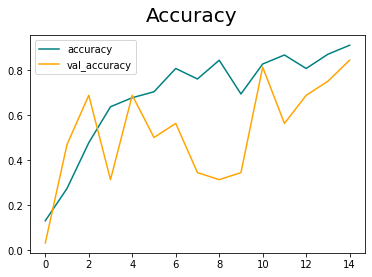

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 7. Evaluate

In [24]:
model.evaluate(test_generator)

3/3 [==============================] - 7s 2s/step - loss: 2.1958 - accuracy: 0.5814


[2.1958441734313965, 0.5813953280448914]

In [ ]:
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
print("Validation Loss: {:.2f}".format(evaluation[0]))
print("Validation Accuracy: {:.2f}%".format(evaluation[1] * 100))

# Test the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss: {:.2f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

In [ ]:
# Testing the 
test_image_path = r'C:\Users\Thameur\Desktop\projet\Data\train\Bitraff\IMG_20230529_192446.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = names_of_classes[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Bitraf')

# 7. Save model

In [ ]:
model.save('Veg1.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
predictions = model.predict(test_generator)

In [ ]:
for images, labels in test_generator:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    misclassified_indices = np.where(predicted_labels != np.argmax(labels, axis=1))[0]
    
    for index in misclassified_indices:
        img = images[index]
        true_label = np.argmax(labels[index])
        predicted_label = predicted_labels[index]
        plt.imshow(img)
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()
    
    break  # Show only the first batch of misclassified images

In [ ]:
# Load the trained model
model = load_model('C:/Users/Thameur/Desktop/projet/Veg1.h5')

# Load an image for prediction
image_path = 'C:/Users/Thameur/Desktop/projet/Data/test/oignon/IMG_20230529_191928.jpg'
img = image.load_img(image_path, target_size=IMAGE_SHAPE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = img_array / 255.0

# Make the prediction
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Print the predicted label
print(f"Predicted Label: {names_of_classes[predicted_label]}")
